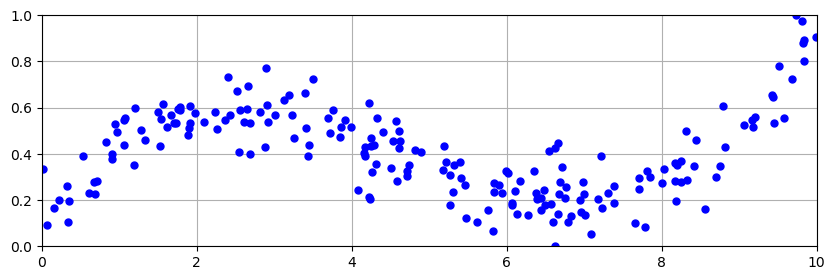

In [2]:
# Get data
using CSV

# import data set
raw = CSV.read("xy_data.csv", datarow=1)

x_values = raw[1:end,1]
y_values = raw[1:end,2]

using PyPlot
figure(figsize=(10,3))
plot(x_values,y_values,"b.", markersize=10)
axis([0,10,0,1])
grid("True")

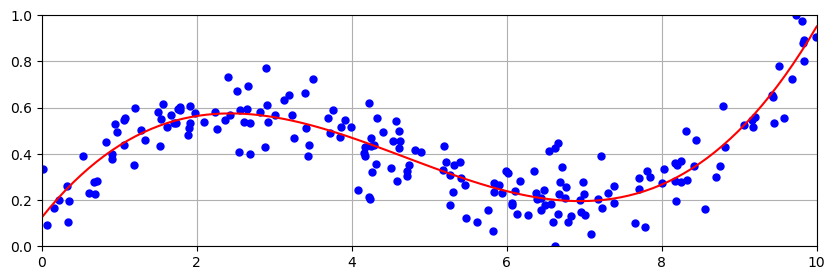

Optimal
0.0017168783312305758
0.008261809676128747x^3 -0.1162652095904954x^2 + 0.41918567228551923x + 1


In [6]:
# order of polynomial to use
k = 3

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x_values)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x_values[i]^(k+1-j)
    end
end

# Solve the LEAST SQUARES polynomial fit

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:k+1])
@objective(m, Min, 1/1000*sum( (y_values - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt[1],"x^3 ",uopt[2],"x^2 + ",uopt[3],"x + 1")

using PyPlot
npts = 100
xfine = range(0,stop=10,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
axis([0,10,0,1])
grid()

# b

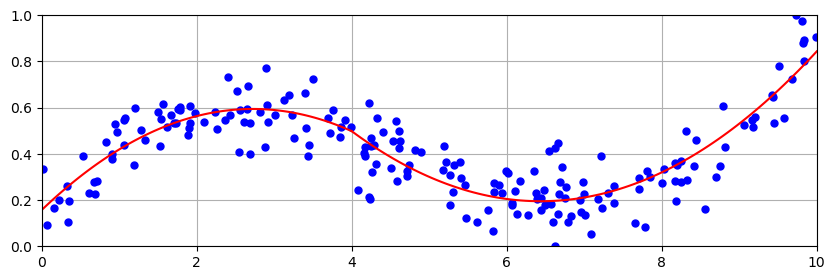

Optimal
0.0018618348118467146
-0.058967633987048323x^3 +0.32117575807306414x^2 + 0.157072744973204x + 1
0.05107862325167082x^3 -0.6575472306161457x^2 + 2.3112245839105374x + 1


In [9]:
# order to use
k = 2

n = length(x_values)

A = zeros(n,2*(k+1))

for i = 1:n
    if(x_values[i] < 4)
        for j = 1:3
            A[i,j] = x_values[i]^(k+1-j) # first quadratic functions in range 0 <= x < 4
        end
    else
        for j = 4:6
            A[i,j] = x_values[i]^(6-j)  # second quadratic functions in range 4 <= x < 10
        end
    end
end

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:6])
@constraint(m, 16*u[1]+4*u[2]+u[3] == 16*u[4]+4*u[5]+u[6]) # two quadratic polynomials should meet at x = 4
@objective(m, Min, 1/1000*sum( (y_values - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt[1],"x^3 +",uopt[2],"x^2 + ",uopt[3],"x + 1")
println(uopt[4],"x^3 ",uopt[5],"x^2 + ",uopt[6],"x + 1")

using PyPlot
npts = 100
xfine1 = range(0,stop=4,length=npts)
ffine1 = ones(npts)
for j = 1:k
    ffine1 = [ffine1.*xfine1 ones(npts)]
end
xfine2 = range(4,stop=10,length=npts)
ffine2 = ones(npts)
for j = 1:k
    ffine2 = [ffine2.*xfine2 ones(npts)]
end
yfine1 = ffine1 * uopt[1:3]
yfine2 = ffine2 * uopt[4:6]
figure(figsize=(10,3))
plot( x_values, y_values, "b.", markersize=10)
plot( xfine1, yfine1, "r-")
plot( xfine2, yfine2, "r-")
axis([0,10,0,1])
grid()